<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/CodeLLama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install git+https://github.com/huggingface/transformers.git@refs/pull/25740/head accelerate

  Cloning https://github.com/huggingface/transformers.git (to revision refs/pull/25740/head) to /tmp/pip-req-build-cfk189tz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-cfk189tz
  Running command git fetch -q https://github.com/huggingface/transformers.git refs/pull/25740/head
  Running command git checkout -q 69a34f218a04312e9a2ad860c36d26d5ac72b218
  Resolved https://github.com/huggingface/transformers.git to commit 69a34f218a04312e9a2ad860c36d26d5ac72b218
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
  Cre

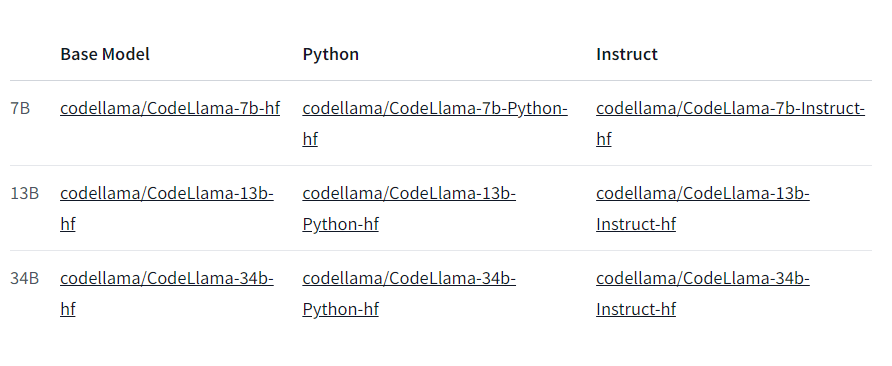

* Instruction Model can take answer from a human being and provide answer.

* all the above models have 16k context window
* It has shown improvement upto 100k tokens
* support infilling based on the surrounding code

##Languages Supported

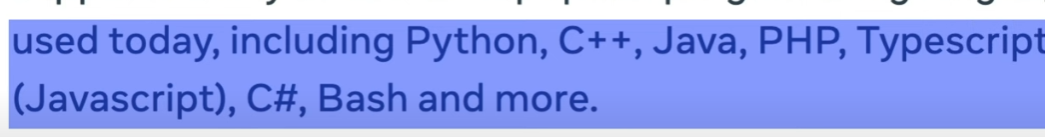

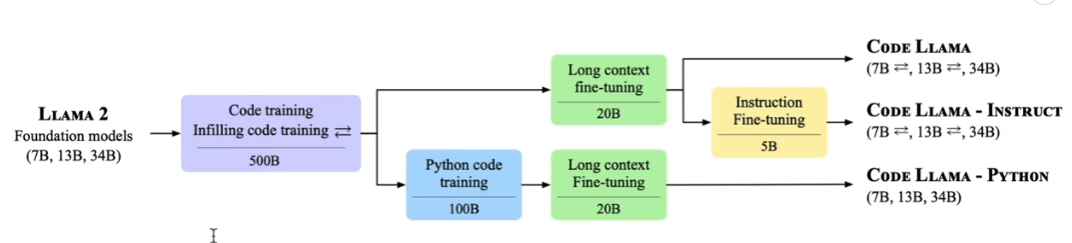

## Training Prompts
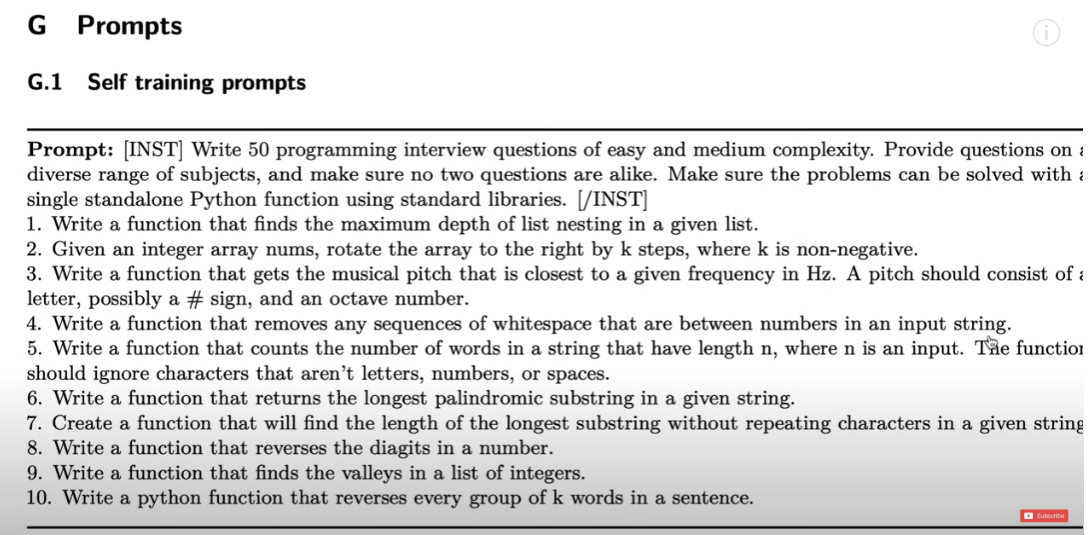

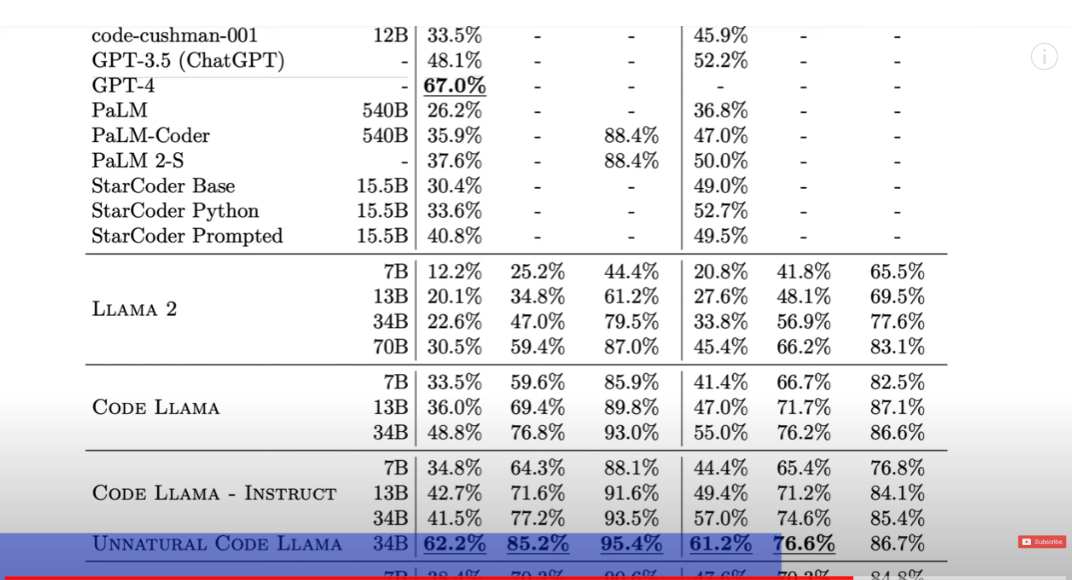

In [2]:
from transformers import AutoTokenizer
import transformers
import torch

model = "codellama/CodeLlama-7b-Python-hf"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

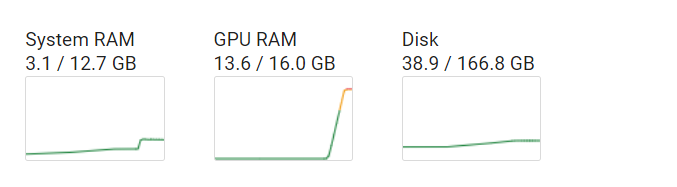

In [3]:
import gc
gc.collect()
torch.cuda.empty_cache()

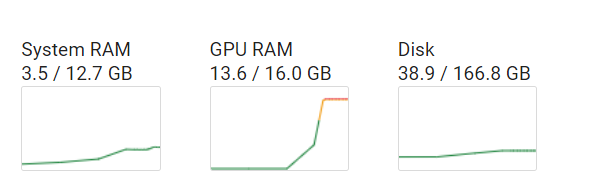

In [7]:
prompt = """ #Inference script to generate inference for Question Answering using T5 Transformers
import os
import json
from transformers import , AutoModelForCausalLM
"""

## Generate response

In [6]:
def generate_response(prompt):
  sequences = pipeline(
      prompt,
      do_sample=True,
      top_k=10,
      temperature=0.1,
      top_p=0.95,
      num_return_sequences=1,
      eos_token_id=tokenizer.eos_token_id,
      max_length=256,
  )
  return sequences


## Inference Time

In [8]:
%%time
sequences = generate_response(prompt)
#
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Result:  #Inference script to generate inference for Question Answering using T5 Transformers
import os
import json
from transformers import , AutoModelForCausalLM
from transformers import T5Tokenizer
import torch
import torch.nn.functional as F
import numpy as np
import random
import time
import sys
import argparse


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


def top_k_top_p_filtering(logits, top_k=0, top_p=0.0, filter_value=-float('Inf')):
    """ Filter a distribution of logits using top-k and/or nucleus (top-p) filtering
        Args:
            logits: logits distribution shape (vocabulary size)
            top_k > 0: keep only top k tokens with highest probability (top-k filtering
CPU times: user 11.1 s, sys: 0 ns, total: 11.1 s
Wall time: 11.9 s


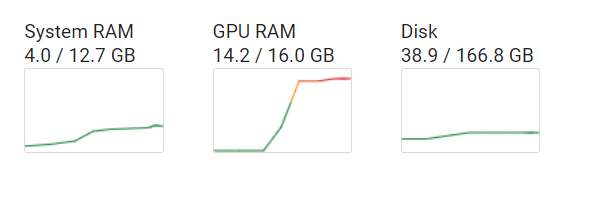

In [9]:
import gc
gc.collect()
torch.cuda.empty_cache()

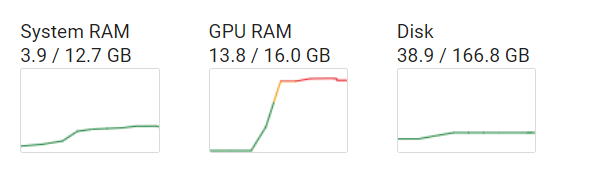